# Readme

This notebook explores macro fundamentals of the US economy, like GDP and M2. Data is taken from the FRED.

# Import modules

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
from fredapi import Fred
fred = Fred(api_key='1fb3a58d70525946b59b02bf881277aa')

# GDP

In [24]:
# get data for GDP and clean it
GDP = fred.get_series('GDP')
GDP.dropna(inplace=True)
print(f"How many null values = {GDP.isnull().sum()}")
GDP

How many null values = 0


1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
2022-10-01    26137.992
2023-01-01    26465.865
Length: 305, dtype: float64

In [27]:
# change in gdp
YoY_GDP = (GDP / GDP.shift(4) - 1) * 100
YoY_GDP

1947-01-01          NaN
1947-04-01          NaN
1947-07-01          NaN
1947-10-01          NaN
1948-01-01     9.285092
                ...    
2022-01-01    10.874995
2022-04-01     9.552429
2022-07-01     9.229224
2022-10-01     7.346758
2023-01-01     6.973935
Length: 305, dtype: float64

Text(0, 0.5, '% change')

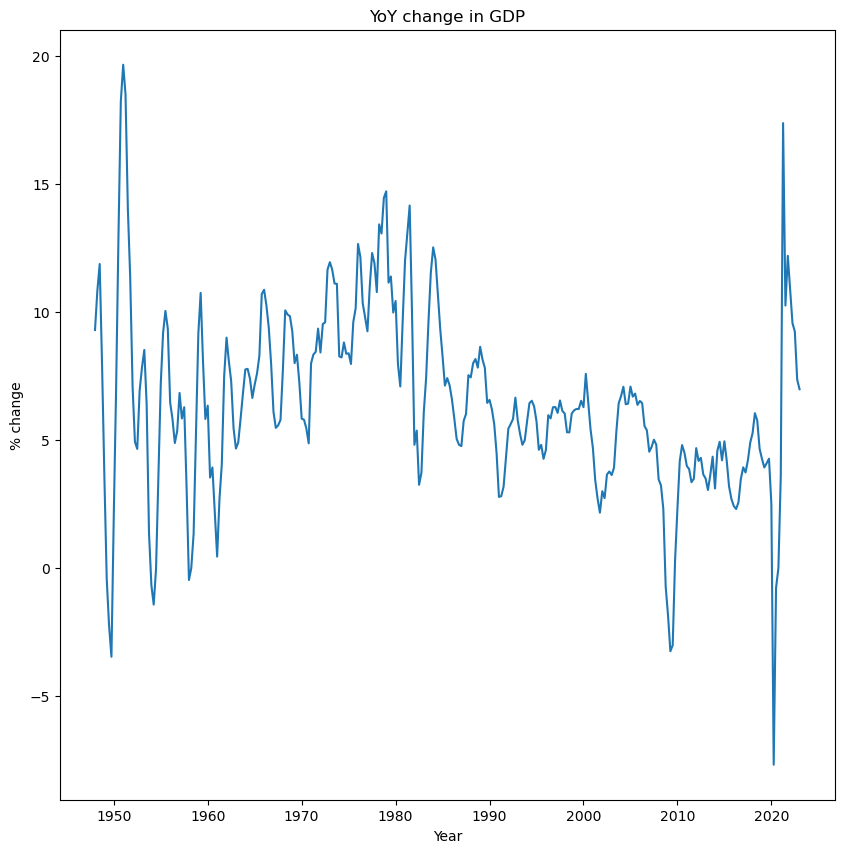

In [33]:
plt.figure(figsize = [10,10])
plt.plot(YoY_GDP)
plt.title("YoY change in GDP")
plt.xlabel("Year")
plt.ylabel("% change")

In [48]:
# change in GDP from 2020
YoY_GDP[YoY_GDP.index >= '2020-01-01']

2020-01-01     2.498191
2020-04-01    -7.689369
2020-07-01    -0.786793
2020-10-01    -0.008412
2021-01-01     3.602084
2021-04-01    17.366450
2021-07-01    10.242244
2021-10-01    12.183602
2022-01-01    10.874995
2022-04-01     9.552429
2022-07-01     9.229224
2022-10-01     7.346758
2023-01-01     6.973935
dtype: float64

# M2

In [61]:
M2 = fred.get_series('M2')
M2

1980-11-03     1591.4
1980-11-10     1592.9
1980-11-17     1596.3
1980-11-24     1597.2
1980-12-01     1596.1
               ...   
2021-01-04    19040.0
2021-01-11    19411.1
2021-01-18    19425.1
2021-01-25    19376.4
2021-02-01    19370.8
Length: 2101, dtype: float64

In [139]:
df = copy.deepcopy(M2)

for date in M2.index:
    
    # find the closest earlier data using max()
    closest_date_before = GDP.index[GDP.index <= date].max()
    # find the closest later data using min()
    closest_date_after = GDP.index[GDP.index >= date].min()
    # print(closest_date_before, closest_date_after, date)
    
    # check how much time can be between them
    if date - closest_date > pd.Timedelta('120D'):
        raise ExceptionType("time between closest dates is more than 2 months")
        
    # extrapolate GDP with a linear model
    x1 = closest_date_before.timestamp()
    x2 = closest_date_after.timestamp()
    y1 = GDP[GDP.index == closest_date_before].values
    y2 = GDP[GDP.index == closest_date_after].values
    
    # calculate for the current date
    x = date.timestamp()
    if x2 - x1 == 0 and y1 == y2:
        y = y1
    else:
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1
        y = m * x + b
    # print(x1, y1, x2, y2, x, y) # for debugging
    
    df[date] = y

Text(0, 0.5, 'Ratio')

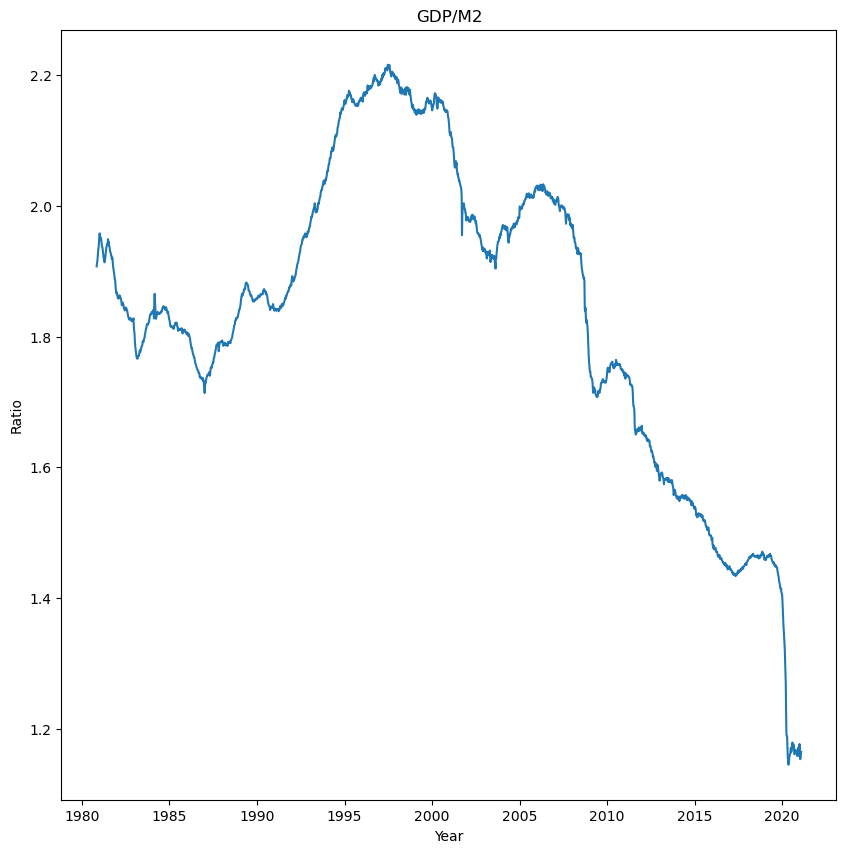

In [141]:
plt.figure(figsize = [10,10])
plt.plot(df/M2)
plt.title("GDP/M2")
plt.xlabel("Year")
plt.ylabel("Ratio")